In [37]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/kpaya/eds220-hwk2


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

Text(0, 0.5, 'Region')

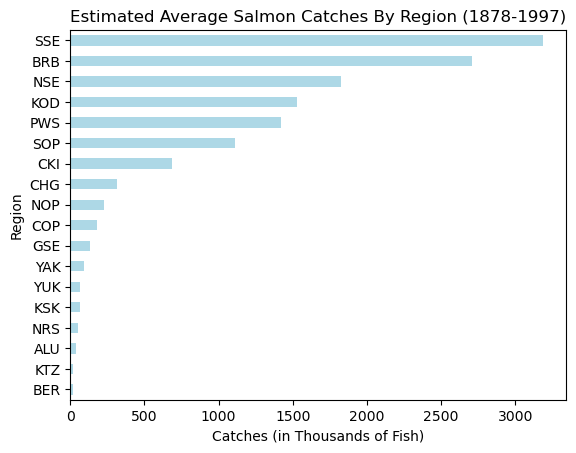

In [49]:
# FINAL CODE

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read in data
catch_data = pd.read_csv('data/salmon_data.csv')

# Data Cleaning

# Find index of letter I in the Catch column
catch_I = catch_data[catch_data['Catch']=="I"]

# Update value that contains a string in the column Catch to a number 1
catch_data.at[400,'Catch']= 1
catch_data['Catch']= catch_data['Catch'].astype('int64')

# Data Plotting

# Sort values of avg_catch
(avg_region
 .sort_values(by='avg_catch')
 
# Plot a horizontal bar graph for the estimated average salmon catches by region
 .plot(kind="barh",
# Specify x and y       
       x='Region', 
       y='avg_catch',
# Assign title, color and remove legend       
      title="Estimated Average Salmon Catches By Region (1878-1997)",
      color='lightblue',
      legend=False)
)

# Add x,y labels
plt.xlabel('Catches (in Thousands of Fish)') 
plt.ylabel('Region')  

## 1

a. Uset this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

<!-- BEGIN QUESTION -->



In [50]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
# Read in data
catch_data = pd.read_csv('data/salmon_data.csv')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [52]:
#First Step:
#Use .head() to view information on the first 10 rows of the dataframe

pd.set_option("display.max_columns",None)
print(catch_data.head(n=10))

# Second Step:
# Check the number of rows and columns

print("Number of rows: ", catch_data.shape[0])
print("Number of columns: ",catch_data.shape[1])

# Display the number of NaN per column
print("Number of NaNs: ", catch_data.isnull().sum())

# Third Step:
# Check data type for each column
print("Data Types: ", catch_data.dtypes)

# Fourth Step:
# Display statistical summary
catch_data.describe()

  Region  Year notesRegCode  Species Catch
0    SSE  1886          NaN  Chinook     0
1    SSE  1887          NaN  Chinook     0
2    SSE  1888          NaN  Chinook     0
3    SSE  1889          NaN  Chinook     0
4    SSE  1890          NaN  Chinook     0
5    SSE  1891          NaN  Chinook     0
6    SSE  1892          NaN  Chinook     0
7    SSE  1893          NaN  Chinook     0
8    SSE  1894          NaN  Chinook     0
9    SSE  1895          NaN  Chinook     3
Number of rows:  8540
Number of columns:  5
Number of NaNs:  Region             0
Year               0
notesRegCode    7125
Species            0
Catch              0
dtype: int64
Data Types:  Region          object
Year             int64
notesRegCode    object
Species         object
Catch           object
dtype: object


,Year
count,8540.000000
mean,1946.323185
std,30.341709
min,1878.000000
25%,1922.000000
50%,1947.000000
75%,1972.000000
max,1997.000000


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

The first step in our data exploration was to visualize the dataset by setting the option pd.set_option("display.max_columns", None) to ensure all columns are displayed. Then I printed the first 10 rows using .head() to get a snapshot of the data.

Next, we assessed the size of the dataset by calculating the number of rows and columns. This provides a sense of the dataset's scale. Calculating the NaN, is important for understanding the extent of missing data which can guide further cleaning steps.

In the third step, we examined the data types of each column to ensure they are appropriate for the data they contain. If any columns had incorrect data types, adjustments would need to be made accordingly.

The last step was to generate summary statistics for numerical columns, which provides insights into the distribution, mean, and standard deviation.

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [53]:
# Find unique column names of catch_data and storing the result in a variable
notes_unique = catch_data['notesRegCode'].unique()

# View result
print(notes_unique)

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [54]:
# Remove `notesRegCode` column from the dataframe
catch_data = catch_data.drop('notesRegCode', axis=1)

# View result
print(catch_data)

     Region  Year  Species Catch
0       SSE  1886  Chinook     0
1       SSE  1887  Chinook     0
2       SSE  1888  Chinook     0
3       SSE  1889  Chinook     0
4       SSE  1890  Chinook     0
...     ...   ...      ...   ...
8535    NOP  1993     Chum   135
8536    NOP  1994     Chum    84
8537    NOP  1995     Chum    99
8538    NOP  1996     Chum    68
8539    NOP  1997     Chum    97

[8540 rows x 4 columns]


<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


The `catch` column should be of type `int64` as it represents the number of fish caught, which is a whole number. Since the `catch` is a count, it cannot be represented as a float, which is typically used for decimal values.
The `Year` column should be datetime as it represents the date when the fish it was caught, converting this column from int64 to datetime will help in the data manipulation.

In [55]:
# View the data type of all columns in catch_data
print("Data Types: ", catch_data.dtypes)

Data Types:  Region     object
Year        int64
Species    object
Catch      object
dtype: object


<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [7]:
# Update datatype of Catch column to int64
catch_data['Catch'].astype('int64')

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. 

In [56]:
# Find index of letter I in the Catch column
catch_I = catch_data[catch_data['Catch']=="I"]

# View result
print(catch_I)

    Region  Year  Species Catch
400    GSE  1955  Chinook     I


## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

In [57]:
# Update value that contains a string in the column Catch to a number 1
catch_data.at[400,'Catch']= 1

In [58]:
# View if the string in row 400, column Catch was updated with a 1
catch_1=catch_data.loc[400,]

# View result
print(catch_1)

Region         GSE
Year          1955
Species    Chinook
Catch            1
Name: 400, dtype: object


## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [59]:
# Update column Catch to type int64
catch_data['Catch']= catch_data['Catch'].astype('int64')

In [60]:
# Store the data type in the variable catch_column_type
catch_column_type = catch_data['Catch'].dtype

# View result
print(catch_column_type)

int64


## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [61]:
# Group dataset by region and take average of the catch per region

avg_region = (catch_data.groupby(['Region'])
              .Catch
              .mean()
              .rename("avg_catch")
              .reset_index()
)

# View result
print(avg_region)

   Region    avg_catch
0     ALU    40.383908
1     BER    16.372549
2     BRB  2709.796491
3     CHG   315.487273
4     CKI   683.571429
5     COP   179.223404
6     GSE   133.841463
7     KOD  1528.350000
8     KSK    67.642353
9     KTZ    18.836145
10    NOP   229.493478
11    NRS    51.502703
12    NSE  1825.020870
13    PWS  1419.236697
14    SOP  1110.942222
15    SSE  3184.660714
16    YAK    91.922917
17    YUK    68.645570


<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

Text(0, 0.5, 'Region')

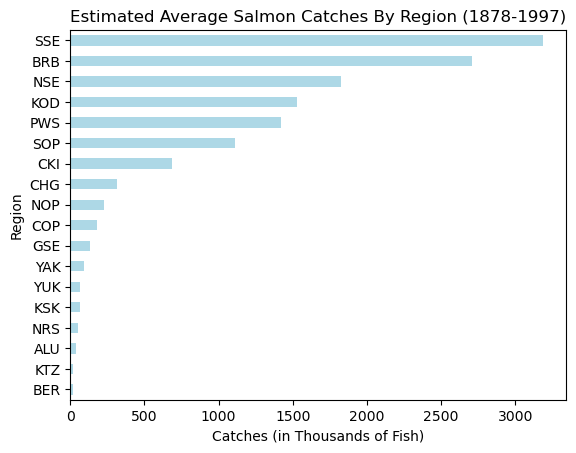

In [62]:
# Sort values of avg_catch
(avg_region
 .sort_values(by='avg_catch')
 
# Plot a horizontal bar graph for the estimated average salmon catches by region
 .plot(kind="barh",
# Specify x and y       
       x='Region', 
       y='avg_catch',
# Assign title, color and remove legend       
      title="Estimated Average Salmon Catches By Region (1878-1997)",
      color='lightblue',
      legend=False)
)

# Add x,y labels
plt.xlabel('Catches (in Thousands of Fish)') 
plt.ylabel('Region')  

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

Southern Southeast Alaska (SSE) and Bristol Bay Management Area (BRB) lead with the highest estimated salmon catches. Southern Southeast Alaska exceeds 3,000 thousand fish.

Northern Southeast Alaska (NSE) and Kodiak Management Area (KOD) follow with significant catches, ranging between 1,500 and ~ 2,000 thousand fish.

Prince William Sound Subarea (PWS) and South Peninsula Subarea (SOP) also report relatively high catches, with over 1,000 thousand fish each.
Regions like Cook Inlet Management Area (CKI) and Chignik Management Area (CHG) have more moderate salmon catches. North Peninsula Subarea (NOP) and regions below it, report notably lower salmon catches, all under 500 thousand fish.

The Bering River Subarea (BER) shows the lowest catches in the dataset.

This bar plot highlights the variation in salmon catch estimates across Alaska's management areas, with the Southern Southeast and Bristol Bay regions standing out as the most productive.

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).